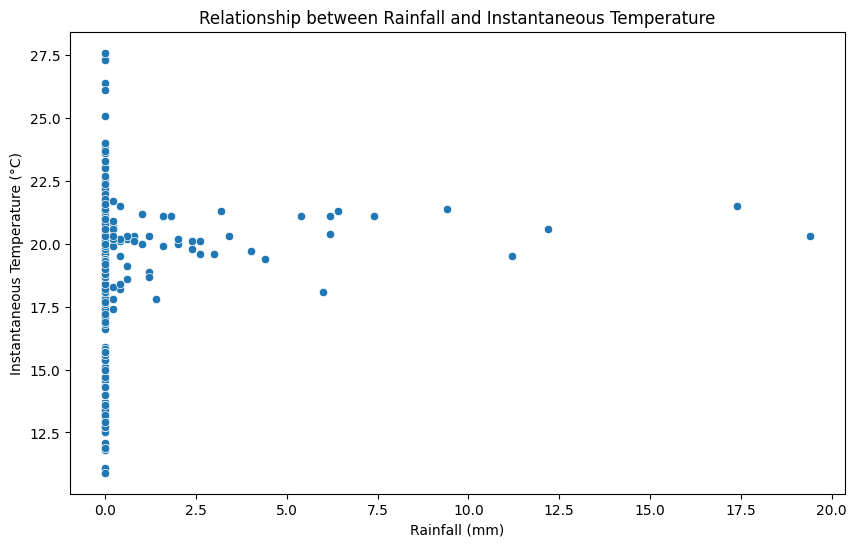

The Pearson correlation coefficient between rainfall and temperature is: 0.11013753491722837


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = 'data.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(data_path, delimiter=';', encoding='utf-8')

# Replace commas with dots and convert to float for numerical columns
columns_to_convert = [
    'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 
    'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)', 
    'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
    'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 
    'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 
    'Radiacao (KJ/m²)', 'Chuva (mm)'
]
for column in columns_to_convert:
    data[column] = data[column].str.replace(',', '.').astype(float)

# Plotting the relationship between rainfall and instantaneous temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Chuva (mm)', y='Temp. Ins. (C)', data=data)
plt.title('Relationship between Rainfall and Instantaneous Temperature')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Instantaneous Temperature (°C)')
plt.show()

# Calculating the Pearson correlation coefficient
correlation = data['Chuva (mm)'].corr(data['Temp. Ins. (C)'])
print(f"The Pearson correlation coefficient between rainfall and temperature is: {correlation}")

In [6]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
input_dim = 10  # Number of input features
hidden_dim = 50
num_layers = 2
output_dim = 1  # Predicting rainfall

model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Dummy data
# Assuming x_train and y_train are dummy data with appropriate shapes
# Replace these with your actual data
x_train = torch.randn(100, 20, input_dim)  # Example: 100 sequences, each of length 20, with 10 features
y_train = torch.randn(100, output_dim)     # Example: 100 target values

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 1.1230037212371826
Epoch 10, Loss: 0.7847574353218079
Epoch 20, Loss: 0.17065179347991943
Epoch 30, Loss: 0.024830840528011322
Epoch 40, Loss: 0.0072135054506361485
Epoch 50, Loss: 0.002431278582662344
Epoch 60, Loss: 0.0008098392281681299
Epoch 70, Loss: 0.0003455459955148399
Epoch 80, Loss: 0.00013219696120359004
Epoch 90, Loss: 4.544249168247916e-05


In [ ]:
import tensorflow as tf

# Build a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras
layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

# Assume satellite images are preprocessed and loaded as numpy arrays
X_images and y_labels are placeholders for the actual data arrays
X_images = np.random.random((100, 128, 128, 3)) # Example synthetic data
y_labels = np.random.randint(2, size=(100, 1))

# Training the model
model.fit(X_images, y_labels, epochs=10, batch_size=10, validation_split=0.2)